<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week13.do.txt --no_mako -->
<!-- dom:TITLE: Advanced machine learning and data analysis for the physical sciences -->

# Advanced machine learning and data analysis for the physical sciences
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway

Date: **April 24, 2025**

## Plans for the week April 21-25, 2025

**Deep generative models.**

1. Discussion of project 2

2. Variational Autoencoders (VAE), Mathematics and codes, continuation from last week

3. Reading recommendation:

a. Goodfellow et al sections  20.10-20-14 on VAEs

b. Calvin Luo <https://calvinyluo.com/2022/08/26/diffusion-tutorial.html>

c. An Introduction to Variational Autoencoders, by Kingma and Welling, see <https://arxiv.org/abs/1906.02691>
<!-- o [Video of lecture](https://youtu.be/rw-NBN293o4) -->
<!-- o [Whiteboard notes](https://github.com/CompPhysics/AdvancedMachineLearning/blob/main/doc/HandwrittenNotes/2024/NotesApril16.pdf) -->

<!-- todo: add about Langevin sampling, see <https://www.lyndonduong.com/sgmcmc/> -->
<!-- code for VAEs applied to MNIST -->

## Summary of Variational Autoencoders (VAEs)

In our summary of VAes from last time, we will also remind you about the
mathematics of Boltzmann machines and the Kullback-Leibler divergence,
leading to various  ways to optimize the probability
distributions, namely what is also called 
* Contrastive optimization

## Boltzmann machines and energy-based models and contrastive optimization

For Boltzmann machines  we defined a domain $\boldsymbol{X}$ of stochastic variables $\boldsymbol{X}= \{x_0,x_1, \dots , x_{n-1}\}$ with a pertinent probability distribution

$$
p(\boldsymbol{X})=\prod_{x_i\in \boldsymbol{X}}p(x_i),
$$

where we have assumed that the random varaibles $x_i$ are all independent and identically distributed (iid).

## Probability model

We defined a probability

$$
p(x_i,h_j;\boldsymbol{\Theta}) = \frac{f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

where $f(x_i,h_j;\boldsymbol{\Theta})$ is a function which we assume is larger or
equal than zero and obeys all properties required for a probability
distribution and $Z(\boldsymbol{\Theta})$ is a normalization constant. Inspired by
statistical mechanics, we call it often for the partition function.
It is defined as (assuming that we have discrete probability distributions)

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}).
$$

## Marginal and conditional probabilities

We can in turn define the marginal probabilities

$$
p(x_i;\boldsymbol{\Theta}) = \frac{\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

and

$$
p(h_i;\boldsymbol{\Theta}) = \frac{\sum_{x_i\in \boldsymbol{X}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})}.
$$

## Partition function

**Note the change to a vector notation**. A variable like $\boldsymbol{x}$
represents now a specific **configuration**. We can generate an infinity
of such configurations. The final partition function is then the sum
over all such possible configurations, that is

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}),
$$

changes to

$$
Z(\boldsymbol{\Theta})=\sum_{\boldsymbol{x}}\sum_{\boldsymbol{h}} f(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta}).
$$

If we have a binary set of variable $x_i$ and $h_j$ and $M$ values of $x_i$ and $N$ values of $h_j$ we have in total $2^M$ and $2^N$ possible $\boldsymbol{x}$ and $\boldsymbol{h}$ configurations, respectively.

We see that even for the modest binary case, we can easily approach a
number of configuration which is not possible to deal with.

## Optimization problem

At the end, we are not interested in the probabilities of the hidden variables. The probability we thus want to optimize is

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\prod_{x_i\in \boldsymbol{X}}p(x_i;\boldsymbol{\Theta})=\prod_{x_i\in \boldsymbol{X}}\left(\frac{\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})}\right),
$$

which we rewrite as

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\frac{1}{Z(\boldsymbol{\Theta})}\prod_{x_i\in \boldsymbol{X}}\left(\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})\right).
$$

## Further simplifications

We simplify further by rewriting it as

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\frac{1}{Z(\boldsymbol{\Theta})}\prod_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta}),
$$

where we used $p(x_i;\boldsymbol{\Theta}) = \sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})$.
The optimization problem is then

$$
{\displaystyle \mathrm{arg} \hspace{0.1cm}\max_{\boldsymbol{\boldsymbol{\Theta}}\in {\mathbb{R}}^{p}}} \hspace{0.1cm}p(\boldsymbol{X};\boldsymbol{\Theta}).
$$

## Optimizing the logarithm instead

Computing the derivatives with respect to the parameters $\boldsymbol{\Theta}$ is
easier (and equivalent) with taking the logarithm of the
probability. We will thus optimize

$$
{\displaystyle \mathrm{arg} \hspace{0.1cm}\max_{\boldsymbol{\boldsymbol{\Theta}}\in {\mathbb{R}}^{p}}} \hspace{0.1cm}\log{p(\boldsymbol{X};\boldsymbol{\Theta})},
$$

which leads to

$$
\nabla_{\boldsymbol{\Theta}}\log{p(\boldsymbol{X};\boldsymbol{\Theta})}=0.
$$

## Expression for the gradients

This leads to the following equation

$$
\nabla_{\boldsymbol{\Theta}}\log{p(\boldsymbol{X};\boldsymbol{\Theta})}=\nabla_{\boldsymbol{\Theta}}\left(\sum_{x_i\in \boldsymbol{X}}\log{f(x_i;\boldsymbol{\Theta})}\right)-\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=0.
$$

The first term is called the positive phase and we assume that we have a model for the function $f$ from which we can sample values. Below we will develop an explicit model for this.
The second term is called the negative phase and is the one which leads to more difficulties.

## Contrastive optimization
The evaluation of these two terms leads to what in the literature is called contrastive optimization.

If we optimize the negative **log** of the PDF, the aboves phases simply change sign.

For a further discussion of energy-based models, see the notes by Philip Lippe at <https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial8/Deep_Energy_Models.html>

## The derivative of the partition function

The partition function, defined above as

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}),
$$

is in general the most problematic term. In principle both $x$ and $h$ can span large degrees of freedom, if not even infinitely many ones, and computing the partition function itself is often not desirable or even feasible. The above derivative of the partition function can however be written in terms of an expectation value which is in turn evaluated  using Monte Carlo sampling and the theory of Markov chains, popularly shortened to MCMC (or just MC$^2$).

## Explicit expression for the derivative
We can rewrite

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{\nabla_{\boldsymbol{\Theta}}Z(\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

which reads in more detail

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{\nabla_{\boldsymbol{\Theta}} \sum_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta})   }{Z(\boldsymbol{\Theta})}.
$$

We can rewrite the function $f$ (we have assumed that is larger or
equal than zero) as $f=\exp{\log{f}}$. We can then reqrite the last
equation as

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{ \sum_{x_i\in \boldsymbol{X}} \nabla_{\boldsymbol{\Theta}}\exp{\log{f(x_i;\boldsymbol{\Theta})}}   }{Z(\boldsymbol{\Theta})}.
$$

## Final expression

Taking the derivative gives us

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{ \sum_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta}) \nabla_{\boldsymbol{\Theta}}\log{f(x_i;\boldsymbol{\Theta})}   }{Z(\boldsymbol{\Theta})},
$$

which is the expectation value of $\log{f}$

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\sum_{x_i\in \boldsymbol{X}}p(x_i;\boldsymbol{\Theta}) \nabla_{\boldsymbol{\Theta}}\log{f(x_i;\boldsymbol{\Theta})},
$$

that is

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\mathbb{E}(\log{f(x_i;\boldsymbol{\Theta})}).
$$

This quantity is evaluated using Monte Carlo sampling, with Gibbs
sampling as the standard sampling rule.

## Kullback-Leibler divergence

Before we continue, we need to remind ourselves about the
Kullback-Leibler divergence introduced earlier. This will also allow
us to introduce another measure used in connection with the training
of Generative Adversarial Networks, the so-called Jensen-Shannon divergence..
These metrics are useful for quantifying the similarity between two probability distributions.

The Kullback–Leibler (KL) divergence, labeled $D_{KL}$,   measures how one probability distribution $p$ diverges from a second expected probability distribution $q$,
that is

$$
D_{KL}(p \| q) = \int_x p(x) \log \frac{p(x)}{q(x)} dx.
$$

The KL-divegrnece $D_{KL}$ achieves the minimum zero when $p(x) == q(x)$ everywhere.

Note that the KL divergence is asymmetric. In cases where $p(x)$ is
close to zero, but $q(x)$ is significantly non-zero, the $q$'s effect
is disregarded. It could cause buggy results when we just want to
measure the similarity between two equally important distributions.

## Jensen-Shannon divergence

The Jensen–Shannon (JS) divergence is another measure of similarity between
two probability distributions, bounded by $[0, 1]$. The JS-divergence is
symmetric and more smooth than the KL-divergence.
It is defined as

$$
D_{JS}(p \| q) = \frac{1}{2} D_{KL}(p \| \frac{p + q}{2}) + \frac{1}{2} D_{KL}(q \| \frac{p + q}{2})
$$

Many practitioners believe that one reason behind GANs' big success is
switching the loss function from asymmetric KL-divergence in
traditional maximum-likelihood approach to symmetric JS-divergence.

## Generative model,  basic overview (Borrowed from Rashcka et al)

<!-- dom:FIGURE: [figures/figure1.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure1.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Reminder on VAEs

Mathematically, we can imagine the latent variables and the data we
observe as modeled by a joint distribution $p(\boldsymbol{x}, \boldsymbol{h};\boldsymbol{\Theta})$.  Recall one
approach of generative modeling, termed likelihood-based, is to
learn a model to maximize the likelihood $p(\boldsymbol{x};\boldsymbol{\Theta})$ of all observed
$\boldsymbol{x}$.  There are two ways we can manipulate this joint distribution
to recover the likelihood of purely our observed data $p(\boldsymbol{x};\boldsymbol{\Theta})$; we can
explicitly marginalize
out the latent variable $\boldsymbol{h}$

$$
p(\boldsymbol{x}) = \int p(\boldsymbol{x}, \boldsymbol{h})d\boldsymbol{h}
$$

or, we could also appeal to the chain rule of probability

$$
p(\boldsymbol{x}) = \frac{p(\boldsymbol{x}, \boldsymbol{h})}{p(\boldsymbol{h}|\boldsymbol{x})}
$$

We suppress here the dependence	on the optimization parameters $\boldsymbol{\Theta}$.

## Evidence Lower Bound
Directly computing and maximizing the likelihood $p(\boldsymbol{x})$ is
difficult because it either involves integrating out all latent
variables $\boldsymbol{h}$, which is intractable for
complex models, or it involves having access to a ground truth latent
encoder $p(\boldsymbol{h}|\boldsymbol{x})$.

Using the last  two equations, we can derive a term called the Evidence Lower Bound (ELBO), which as its name suggests, is a lower
  bound of the evidence.  The evidence is quantified in this case as
the log likelihood of the observed data.  Then, maximizing the ELBO
becomes a proxy objective with which to optimize a latent variable
model; in the best case, when the ELBO is powerfully parameterized and
perfectly optimized, it becomes exactly equivalent to the evidence.

## ELBO equations
Formally, the equation of the ELBO is

$$
\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]
$$

To make the relationship with the evidence explicit, we can mathematically write:

$$
\log p(\boldsymbol{x}) \geq \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]
$$

## Introducing the encoder function

Here, $q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ is a flexible approximate
variational distribution with parameters $\boldsymbol{\phi}$ that we seek to
optimize.  Intuitively, it can be thought of as a parameterizable
model that is learned to estimate the true distribution over latent
variables for given observations $\boldsymbol{x}$; in other words, it seeks to
approximate true posterior $p(\boldsymbol{h}|\boldsymbol{x})$.  As we saw last week when we
explored Variational Autoencoders, as we increase the lower bound
by tuning the parameters $\boldsymbol{\phi}$ to maximize the ELBO, we gain
access to components that can be used to model the true data
distribution and sample from it, thus learning a generative model.

## The derivation from last week

To better understand the relationship between the evidence and the ELBO, let us remind ourselves about the derivations from our previous lecture, this time using

$$
\begin{align*}
\log p(\boldsymbol{x}) & = \log p(\boldsymbol{x}) \int q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})d\boldsymbol{h} && \text{(Multiply by $1 = \int q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})d\boldsymbol{h}$)}\\
          & = \int q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})(\log p(\boldsymbol{x}))d\boldsymbol{h} && \text{(Bring evidence into integral)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p(\boldsymbol{x})\right] && \text{(Definition of Expectation)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{p(\boldsymbol{h}|\boldsymbol{x})}\right]&& \\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}{p(\boldsymbol{h}|\boldsymbol{x})q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]&& \text{(Multiply by $1 = \frac{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}$)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right] + \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}{p(\boldsymbol{h}|\boldsymbol{x})}\right] && \text{(Split the Expectation)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right] +
	  D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})\vert\vert p(\boldsymbol{h}|\boldsymbol{x}))  && \text{(Definition of KL Divergence)}\\
          & \geq \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]  && \text{(KL Divergence always $\geq 0$)}
\end{align*}
$$

## Analysis

From this derivation, we clearly observe from the last equation
that the evidence is equal to the ELBO plus the KL Divergence between
the approximate posterior $q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ and the true
posterior $p(\boldsymbol{h}|\boldsymbol{x})$.  Understanding this term is the
key to understanding not only the relationship between the ELBO and
the evidence, but also the reason why optimizing the ELBO is an
appropriate objective at all.

## The VAE

In the default formulation of the VAE by Kingma and Welling (2015), we directly maximize the ELBO.  This
approach is \textit{variational}, because we optimize for the best
$q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ amongst a family of potential posterior
distributions parameterized by $\boldsymbol{\phi}$.  It is called an
\textit{autoencoder} because it is reminiscent of a traditional
autoencoder model, where input data is trained to predict itself after
undergoing an intermediate bottlenecking representation step.

## Dissecting the equations
To make
this connection explicit, let us dissect the ELBO term further:

$$
\begin{align*}
{\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]}
&= {\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})p(\boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]}         && {\text{(Chain Rule of Probability)}}\\
&= {\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})\right] + \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]}         && {\text{(Split the Expectation)}}\\
&= \underbrace{{\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})\right]}}_\text{reconstruction term} - \underbrace{{D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\vert\vert{p(\boldsymbol{h}))}}_\text{prior matching term} && {\text{(Definition of KL Divergence)}}
\end{align*}
$$

## Bottlenecking distribution

In this case, we learn an intermediate bottlenecking distribution
$q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ that can be treated as
an \textit{encoder}; it transforms inputs into a distribution over
possible latents.  Simultaneously, we learn a deterministic function
$p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})$ to convert a given latent vector
$\boldsymbol{h}$ into an observation $\boldsymbol{x}$, which can be interpreted as
a \textit{decoder}.

## Decoder and encoder
The two terms in the last equation each have intuitive descriptions: the first
term measures the reconstruction likelihood of the decoder from our
variational distribution; this ensures that the learned distribution
is modeling effective latents that the original data can be
regenerated from.  The second term measures how similar the learned
variational distribution is to a prior belief held over latent
variables.  Minimizing this term encourages the encoder to actually
learn a distribution rather than collapse into a Dirac delta function.
Maximizing the ELBO is thus equivalent to maximizing its first term
and minimizing its second term.

## Defining feature of VAEs

A defining feature of the VAE is how the ELBO is optimized jointly over parameters $\boldsymbol{\phi}$ and $\boldsymbol{\theta}$.  The encoder of the VAE is commonly chosen to model a multivariate Gaussian with diagonal covariance, and the prior is often selected to be a standard multivariate Gaussian:

$$
\begin{align*}
    q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x}) &= N(\boldsymbol{h}; \boldsymbol{\mu}_{\boldsymbol{\phi}}(\boldsymbol{x}), \boldsymbol{\sigma}_{\boldsymbol{\phi}}^2(\boldsymbol{x})\textbf{I})\\
    p(\boldsymbol{h}) &= N(\boldsymbol{h}; \boldsymbol{0}, \textbf{I})
\end{align*}
$$

## Analytical evaluation

Then, the KL divergence term of the ELBO can be computed analytically, and the reconstruction term can be approximated using a Monte Carlo estimate.  Our objective can then be rewritten as:

$$
\begin{align*}
  \mathrm{argmax}_{\boldsymbol{\phi}, \boldsymbol{\theta}} \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})\right] - D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})\vert\vert p(\boldsymbol{h})) \approx \mathrm{argmax}_{\boldsymbol{\phi}, \boldsymbol{\theta}} \sum_{l=1}^{L}\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h}^{(l)}) - D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})\vert\vert p(\boldsymbol{h}))
\end{align*}
$$

where latents $\{\boldsymbol{h}^{(l)}\}_{l=1}^L$ are sampled from $q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$, for every observation $\boldsymbol{x}$ in the dataset.

## Reparameterization trick

However, a problem arises in this default setup: each $\boldsymbol{h}^{(l)}$
that our loss is computed on is generated by a stochastic sampling
procedure, which is generally non-differentiable.  Fortunately, this
can be addressed via the \textit{reparameterization trick} when
$q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ is designed to model certain
distributions, including the multivariate Gaussian.

## Actual implementation

The reparameterization trick rewrites a random variable as a
deterministic function of a noise variable; this allows for the
optimization of the non-stochastic terms through gradient descent.
For example, samples from a normal distribution
$x \sim N(x;\mu, \sigma^2)$ with arbitrary mean $\mu$ and
variance $\sigma^2$ can be rewritten as

$$
\begin{align*}
    x &= \mu + \sigma\epsilon \quad \text{with } \epsilon \sim N(\epsilon; 0, \boldsymbol{I})
\end{align*}
$$

## Interpretation
An arbitrary Gaussian distributions can be interpreted as
standard Gaussians (of which $\epsilon$ is a sample) that have their
mean shifted from zero to the target mean $\mu$ by addition, and their
variance stretched by the target variance $\sigma^2$.  Therefore, by
the reparameterization trick, sampling from an arbitrary Gaussian
distribution can be performed by sampling from a standard Gaussian,
scaling the result by the target standard deviation, and shifting it
by the target mean.

## Deterministic function

In a VAE, each $\boldsymbol{h}$ is thus computed as a deterministic function of input $\boldsymbol{x}$ and auxiliary noise variable $\boldsymbol{\epsilon}$:

$$
\begin{align*}
    \boldsymbol{h} &= \boldsymbol{\mu}_{\boldsymbol{\phi}}(\boldsymbol{x}) + \boldsymbol{\sigma}_{\boldsymbol{\phi}}(\boldsymbol{x})\odot\boldsymbol{\epsilon} \quad \text{with } \boldsymbol{\epsilon} \sim N(\boldsymbol{\epsilon};\boldsymbol{0}, \textbf{I})
\end{align*}
$$

where $\odot$ represents an element-wise product.  Under this
reparameterized version of $\boldsymbol{h}$, gradients can then be computed
with respect to $\boldsymbol{\phi}$ as desired, to optimize
$\boldsymbol{\mu}_{\boldsymbol{\phi}}$ and $\boldsymbol{\sigma}_{\boldsymbol{\phi}}$.  The VAE
therefore utilizes the reparameterization trick and Monte Carlo
estimates to optimize the ELBO jointly over $\boldsymbol{\phi}$ and
$\boldsymbol{\theta}$.

## After training

After training a VAE, generating new data can be performed by sampling
directly from the latent space $p(\boldsymbol{h})$ and then running it through
the decoder.  Variational Autoencoders are particularly interesting
when the dimensionality of $\boldsymbol{h}$ is less than that of input
$\boldsymbol{x}$, as we might then be learning compact, useful
representations.  Furthermore, when a semantically meaningful latent
space is learned, latent vectors can be edited before being passed to
the decoder to more precisely control the data generated.

## Setting up SGD
So how can we perform stochastic gradient descent?

First we need to be a bit more specific about the form that $Q(\boldsymbol{h}|\boldsymbol{x})$
will take.  The usual choice is to say that
$Q(\boldsymbol{h}|\boldsymbol{x})=\mathcal{N}(\boldsymbol{h}|\mu(\boldsymbol{x};\vartheta),\Sigma(;\vartheta))$, where
$\mu$ and $\Sigma$ are arbitrary deterministic functions with
parameters $\vartheta$ that can be learned from data (we will omit
$\vartheta$ in later equations).  In practice, $\mu$ and $\Sigma$ are
again implemented via neural networks, and $\Sigma$ is constrained to
be a diagonal matrix.

## More on the SGD

The name variational "autoencoder" comes from
the fact that $\mu$ and $\Sigma$ are "encoding" $\boldsymbol{x}$ into the latent
space $\boldsymbol{h}$.  The advantages of this choice are computational, as they
make it clear how to compute the right hand side.  The last
term---$\mathcal{D}\left[Q(\boldsymbol{h}|\boldsymbol{x})\|p(\boldsymbol{h})\right]$---is now a KL-divergence
between two multivariate Gaussian distributions, which can be computed
in closed form as:

$$
\begin{array}{c}
 \mathcal{D}[\mathcal{N}(\mu_0,\Sigma_0) \| \mathcal{N}(\mu_1,\Sigma_1)] = \hspace{20em}\\
  \hspace{5em}\frac{ 1 }{ 2 } \left( \mathrm{tr} \left( \Sigma_1^{-1} \Sigma_0 \right) + \left( \mu_1 - \mu_0\right)^\top \Sigma_1^{-1} ( \mu_1 - \mu_0 ) - k + \log \left( \frac{ \det \Sigma_1 }{ \det \Sigma_0  } \right)  \right)
\end{array}
$$

where $k$ is the dimensionality of the distribution.

## Simplification
In our case, this simplifies to:

$$
\begin{array}{c}
 \mathcal{D}[\mathcal{N}(\mu(X),\Sigma(X)) \| \mathcal{N}(0,I)] = \hspace{20em}\\
\hspace{6em}\frac{ 1 }{ 2 } \left( \mathrm{tr} \left( \Sigma(X) \right) + \left( \mu(X)\right)^\top ( \mu(X) ) - k - \log\det\left(  \Sigma(X)  \right)  \right).
\end{array}
$$

## Terms to compute

The first term on the right hand side is a bit more tricky.
We could use sampling to estimate $E_{z\sim Q}\left[\log P(X|z)  \right]$, but getting a good estimate would require passing many samples of $z$ through $f$, which would be expensive.
Hence, as is standard in stochastic gradient descent, we take one sample of $z$ and treat $\log P(X|z)$ for that $z$ as an approximation of $E_{z\sim Q}\left[\log P(X|z)  \right]$.
After all, we are already doing stochastic gradient descent over different values of $X$ sampled from a dataset $D$.
The full equation we want to optimize is:

$$
\begin{array}{c}
    E_{X\sim D}\left[\log P(X) - \mathcal{D}\left[Q(z|X)\|P(z|X)\right]\right]=\hspace{16em}\\
\hspace{10em}E_{X\sim D}\left[E_{z\sim Q}\left[\log P(X|z)  \right] - \mathcal{D}\left[Q(z|X)\|P(z)\right]\right].
\end{array}
$$

## Computing the gradients

If we take the gradient of this equation, the gradient symbol can be moved into the expectations.
Therefore, we can sample a single value of $X$ and a single value of $z$ from the distribution $Q(z|X)$, and compute the gradient of:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
 \log P(X|z)-\mathcal{D}\left[Q(z|X)\|P(z)\right].
\label{_auto1} \tag{1}
\end{equation}
$$

We can then average the gradient of this function over arbitrarily many samples of $X$ and $z$, and the result converges to the gradient.

There is, however, a significant problem
$E_{z\sim Q}\left[\log P(X|z)  \right]$ depends not just on the parameters of $P$, but also on the parameters of $Q$.

In order to make VAEs work, it is essential to drive $Q$ to produce codes for $X$ that $P$ can reliably decode.

$$
E_{X\sim D}\left[E_{\epsilon\sim\mathcal{N}(0,I)}[\log P(X|z=\mu(X)+\Sigma^{1/2}(X)*\epsilon)]-\mathcal{D}\left[Q(z|X)\|P(z)\right]\right].
$$

## Code examples using Keras

Code taken from  <https://keras.io/examples/generative/vae/>

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

2025-04-20 11:22:26.759351: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


547/547 [==============================] - 24s 35ms/step - loss: 250.6606 - reconstruction_loss: 200.6512 - kl_loss: 3.6577
Epoch 2/30
547/547 [==============================] - 17s 32ms/step - loss: 181.7836 - reconstruction_loss: 174.0208 - kl_loss: 6.8433
Epoch 3/30
547/547 [==============================] - 17s 31ms/step - loss: 179.8640 - reconstruction_loss: 172.0421 - kl_loss: 6.2639
Epoch 4/30
547/547 [==============================] - 18s 32ms/step - loss: 173.7848 - reconstruction_loss: 167.2704 - kl_loss: 5.5585
Epoch 5/30
547/547 [==============================] - 17s 31ms/step - loss: 171.4224 - reconstruction_loss: 165.8300 - kl_loss: 5.6503
Epoch 6/30
547/547 [==============================] - 18s 33ms/step - loss: 170.1095 - reconstruction_loss: 164.4462 - kl_loss: 5.4021
Epoch 7/30
547/547 [==============================] - 18s 32ms/step - loss: 169.8605 - reconstruction_loss: 164.3280 - kl_loss: 5.3284
Epoch 8/30
547/547 [==============================] - 18s 34ms/ste

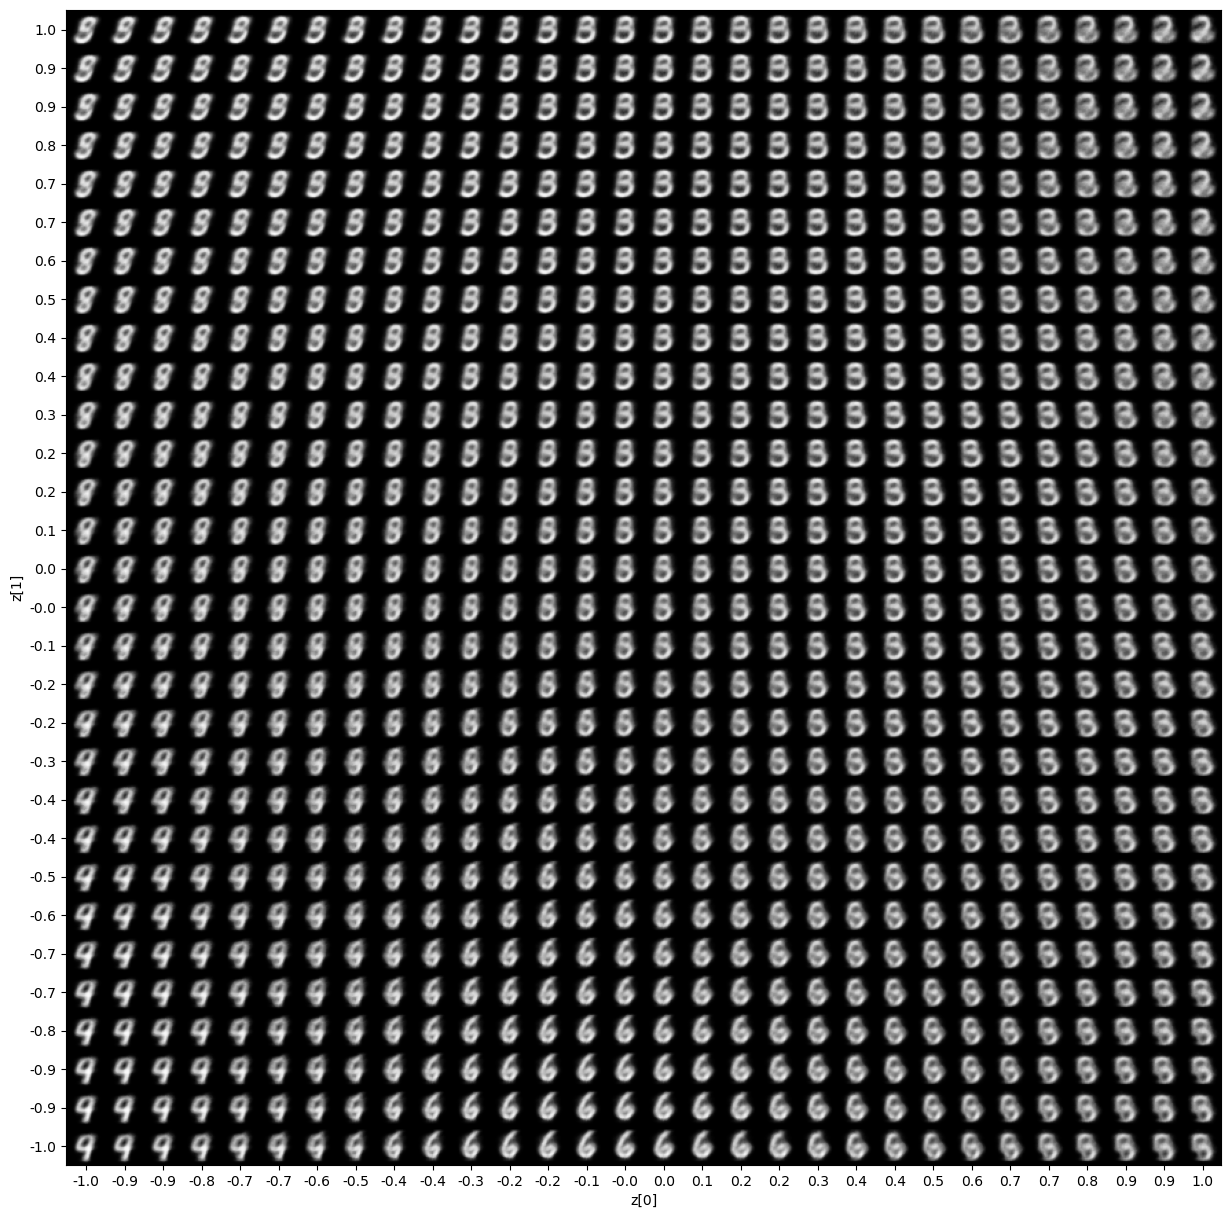

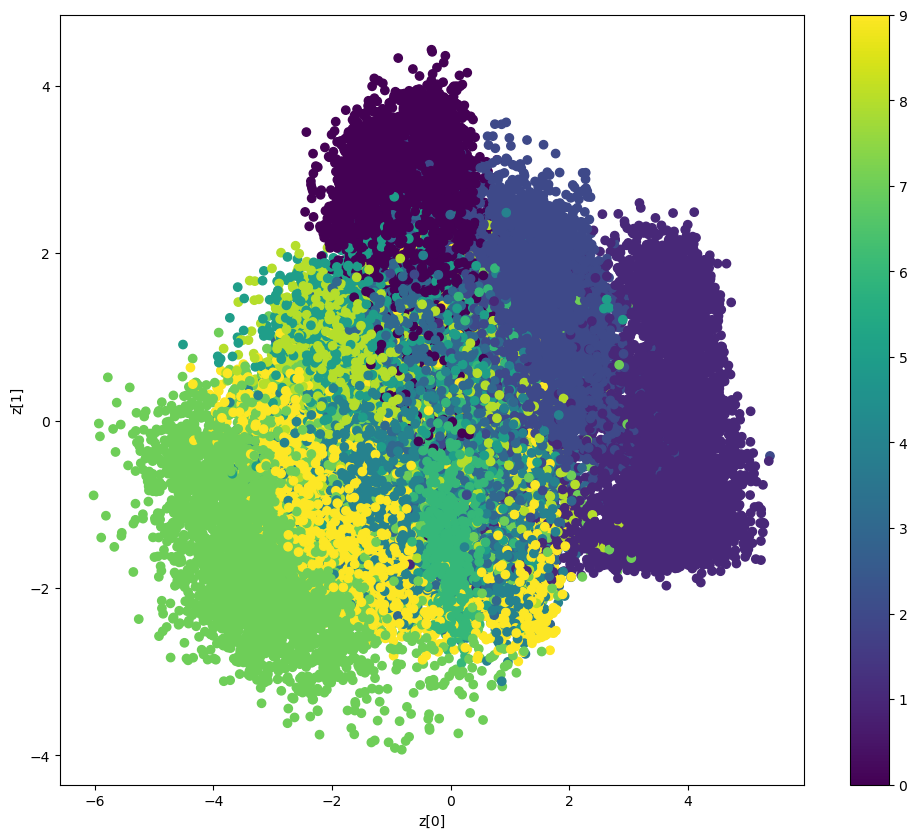

In [1]:
%matplotlib inline

"""
Title: Variational AutoEncoder
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2023/11/22
Description: Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.
Accelerator: GPU
"""

"""
## Setup
"""

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import layers

"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

## Code in PyTorch for VAEs

Epoch 1: Avg Loss: 191.1148
Epoch 2: Avg Loss: 168.9548
Epoch 3: Avg Loss: 164.6074
Epoch 4: Avg Loss: 161.9537
Epoch 5: Avg Loss: 160.1042
Epoch 6: Avg Loss: 158.7487
Epoch 7: Avg Loss: 157.6874
Epoch 8: Avg Loss: 156.6713
Epoch 9: Avg Loss: 155.8930
Epoch 10: Avg Loss: 155.1752


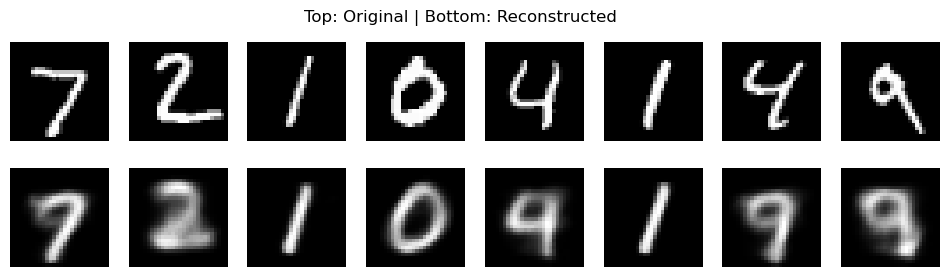

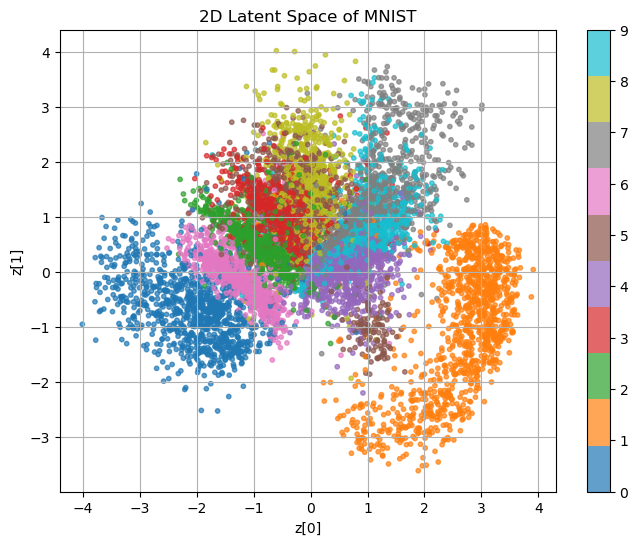

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the VAE
class VAE(nn.Module):
   def __init__(self, input_dim=784, hidden_dim=400, latent_dim=2):
       super(VAE, self).__init__()
       self.fc1 = nn.Linear(input_dim, hidden_dim)
       self.fc_mu = nn.Linear(hidden_dim, latent_dim)
       self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
       self.fc3 = nn.Linear(latent_dim, hidden_dim)
       self.fc4 = nn.Linear(hidden_dim, input_dim)

   def encode(self, x):
       h1 = F.relu(self.fc1(x))
       return self.fc_mu(h1), self.fc_logvar(h1)

   def reparameterize(self, mu, logvar):
       std = torch.exp(0.5 * logvar)
       eps = torch.randn_like(std)
       return mu + eps * std

   def decode(self, z):
       h3 = F.relu(self.fc3(z))
       return torch.sigmoid(self.fc4(h3))

   def forward(self, x):
       mu, logvar = self.encode(x.view(-1, 784))
       z = self.reparameterize(mu, logvar)
       return self.decode(z), mu, logvar

# Loss function
def loss_function(recon_x, x, mu, logvar):
   BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
   KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
   return BCE + KLD

# Prepare data
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training function
def train(epoch):
   model.train()
   train_loss = 0
   for batch_idx, (data, _) in enumerate(train_loader):
       data = data.to(device)
       optimizer.zero_grad()
       recon_batch, mu, logvar = model(data)
       loss = loss_function(recon_batch, data, mu, logvar)
       loss.backward()
       train_loss += loss.item()
       optimizer.step()
   print(f"Epoch {epoch}: Avg Loss: {train_loss / len(train_loader.dataset):.4f}")

# Run training
for epoch in range(1, 11):
   train(epoch)

# Reconstruction Visualization
model.eval()
with torch.no_grad():
   data, _ = next(iter(test_loader))
   data = data.to(device)
   recon_batch, _, _ = model(data)

   n = 8
   comparison = torch.cat([data[:n], recon_batch.view(-1, 1, 28, 28)[:n]])
   comparison = comparison.cpu()

   plt.figure(figsize=(12, 3))
   for i in range(n):
       plt.subplot(2, n, i + 1)
       plt.imshow(comparison[i][0], cmap='gray')
       plt.axis('off')
       plt.subplot(2, n, i + 1 + n)
       plt.imshow(comparison[i + n][0], cmap='gray')
       plt.axis('off')
   plt.suptitle("Top: Original | Bottom: Reconstructed")
   plt.show()

# Latent Space Visualization
model.eval()
z_list = []
label_list = []

with torch.no_grad():
   for data, labels in test_loader:
       data = data.to(device)
       mu, _ = model.encode(data.view(-1, 784))
       z_list.append(mu.cpu())
       label_list.append(labels)

z = torch.cat(z_list).numpy()
labels = torch.cat(label_list).numpy()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(z[:, 0], z[:, 1], c=labels, cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter, ticks=range(10))
plt.title("2D Latent Space of MNIST")
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.grid(True)
plt.show()

## Diffusion models, basics

Diffusion models are inspired by non-equilibrium thermodynamics. They
define a Markov chain of diffusion steps to slowly add random noise to
data and then learn to reverse the diffusion process to construct
desired data samples from the noise. Unlike VAE or flow models,
diffusion models are learned with a fixed procedure and the latent
variable has high dimensionality (same as the original data).

## Problems with probabilistic models

Historically, probabilistic models suffer from a tradeoff between two
conflicting objectives: \textit{tractability} and
\textit{flexibility}. Models that are \textit{tractable} can be
analytically evaluated and easily fit to data (e.g. a Gaussian or
Laplace). However, these models are unable to aptly describe structure
in rich datasets. On the other hand, models that are \textit{flexible}
can be molded to fit structure in arbitrary data. For example, we can
define models in terms of any (non-negative) function $\phi(\boldsymbol{x})$
yielding the flexible distribution $p\left(\boldsymbol{x}\right) =
\frac{\phi\left(\boldsymbol{x} \right)}{Z}$, where $Z$ is a normalization
constant. However, computing this normalization constant is generally
intractable. Evaluating, training, or drawing samples from such
flexible models typically requires a very expensive Monte Carlo
process.

## Diffusion models
Diffusion models have several interesting features
* extreme flexibility in model structure,

* exact sampling,

* easy multiplication with other distributions, e.g. in order to compute a posterior, and

* the model log likelihood, and the probability of individual states, to be cheaply evaluated.

## Original idea

In the original formulation, one uses a Markov chain to gradually
convert one distribution into another, an idea used in non-equilibrium
statistical physics and sequential Monte Carlo. Diffusion models build
a generative Markov chain which converts a simple known distribution
(e.g. a Gaussian) into a target (data) distribution using a diffusion
process. Rather than use this Markov chain to approximately evaluate a
model which has been otherwise defined, one can  explicitly define the
probabilistic model as the endpoint of the Markov chain. Since each
step in the diffusion chain has an analytically evaluable probability,
the full chain can also be analytically evaluated.

## Diffusion learning

Learning in this framework involves estimating small perturbations to
a diffusion process. Estimating small, analytically tractable,
perturbations is more tractable than explicitly describing the full
distribution with a single, non-analytically-normalizable, potential
function.  Furthermore, since a diffusion process exists for any
smooth target distribution, this method can capture data distributions
of arbitrary form.

## Diffusion models, basics

Diffusion models are inspired by non-equilibrium thermodynamics. They
define a Markov chain of diffusion steps to slowly add random noise to
data and then learn to reverse the diffusion process to construct
desired data samples from the noise. Unlike VAE or flow models,
diffusion models are learned with a fixed procedure and the latent
variable has high dimensionality (same as the original data).

## Problems with probabilistic models

Historically, probabilistic models suffer from a tradeoff between two
conflicting objectives: \textit{tractability} and
\textit{flexibility}. Models that are \textit{tractable} can be
analytically evaluated and easily fit to data (e.g. a Gaussian or
Laplace). However, these models are unable to aptly describe structure
in rich datasets. On the other hand, models that are \textit{flexible}
can be molded to fit structure in arbitrary data. For example, we can
define models in terms of any (non-negative) function $\phi(\boldsymbol{x})$
yielding the flexible distribution $p\left(\boldsymbol{x}\right) =
\frac{\phi\left(\boldsymbol{x} \right)}{Z}$, where $Z$ is a normalization
constant. However, computing this normalization constant is generally
intractable. Evaluating, training, or drawing samples from such
flexible models typically requires a very expensive Monte Carlo
process.

## Diffusion models
Diffusion models have several interesting features
* extreme flexibility in model structure,

* exact sampling,

* easy multiplication with other distributions, e.g. in order to compute a posterior, and

* the model log likelihood, and the probability of individual states, to be cheaply evaluated.

## Original idea

In the original formulation, one uses a Markov chain to gradually
convert one distribution into another, an idea used in non-equilibrium
statistical physics and sequential Monte Carlo. Diffusion models build
a generative Markov chain which converts a simple known distribution
(e.g. a Gaussian) into a target (data) distribution using a diffusion
process. Rather than use this Markov chain to approximately evaluate a
model which has been otherwise defined, one can  explicitly define the
probabilistic model as the endpoint of the Markov chain. Since each
step in the diffusion chain has an analytically evaluable probability,
the full chain can also be analytically evaluated.

## Diffusion learning

Learning in this framework involves estimating small perturbations to
a diffusion process. Estimating small, analytically tractable,
perturbations is more tractable than explicitly describing the full
distribution with a single, non-analytically-normalizable, potential
function.  Furthermore, since a diffusion process exists for any
smooth target distribution, this method can capture data distributions
of arbitrary form.

## Mathematics of diffusion models

Let us go back our discussions of the variational autoencoders from
last week, see
<https://github.com/CompPhysics/AdvancedMachineLearning/blob/main/doc/pub/week12/ipynb/week12.ipynb>. As
a first attempt at understanding diffusion models, we can think of
these as stacked VAEs, or better, recursive VAEs.

Let us try to see why. As an intermediate step, we consider so-called
hierarchical VAEs, which can be seen as a generalization of VAEs that
include multiple hierarchies of latent spaces.

**Note**: Many of the derivations and figures here are inspired and borrowed from the excellent exposition of diffusion models by Calvin Luo at <https://arxiv.org/abs/2208.11970>.

## Chains of VAEs

Markovian VAEs represent a generative process where we use Markov
chain to build a hierarchy of VAEs.

Each transition down the hierarchy is Markovian, where we decode each
latent set of variables $\boldsymbol{h}_t$ in terms of the previous latent variable $\boldsymbol{h}_{t-1}$.
Intuitively, and visually, this can be seen as simply stacking VAEs on
top of each other (see figure next slide).

One can think of such a model as a recursive VAE.

## Mathematical representation

Mathematically, we represent the joint distribution and the posterior
of a Markovian VAE as

$$
\begin{align*}
    p(\boldsymbol{x}, \boldsymbol{h}_{1:T}) &= p(\boldsymbol{h}_T)p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h}_1)\prod_{t=2}^{T}p_{\boldsymbol{\theta}}(\boldsymbol{h}_{t-1}|\boldsymbol{h}_{t})\\
    q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x}) &= q_{\boldsymbol{\phi}}(\boldsymbol{h}_1|\boldsymbol{x})\prod_{t=2}^{T}q_{\boldsymbol{\phi}}(\boldsymbol{h}_{t}|\boldsymbol{h}_{t-1})
\end{align*}
$$

## Back to the marginal probability

We can then define the marginal probability we want to optimize as

$$
\begin{align*}
\log p(\boldsymbol{x}) &= \log \int p(\boldsymbol{x}, \boldsymbol{h}_{1:T}) d\boldsymbol{h}_{1:T}  \\
&= \log \int \frac{p(\boldsymbol{x}, \boldsymbol{h}_{1:T})q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})} d\boldsymbol{h}_{1:T}         && \text{(Multiply by 1 = $\frac{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}$)}\\
&= \log \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\left[\frac{p(\boldsymbol{x}, \boldsymbol{h}_{1:T})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\right]         && \text{(Definition of Expectation)}\\
&\geq \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\left[\log \frac{p(\boldsymbol{x}, \boldsymbol{h}_{1:T})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\right]         && \text{(Discussed last week)}
\end{align*}
$$

## Diffusion models for hierarchical VAE, from <https://arxiv.org/abs/2208.11970>

A Markovian hierarchical Variational Autoencoder with $T$ hierarchical
latents.  The generative process is modeled as a Markov chain, where
each latent $\boldsymbol{h}_t$ is generated only from the previous latent
$\boldsymbol{h}_{t+1}$. Here $\boldsymbol{z}$ is our latent variable $\boldsymbol{h}$.

<!-- dom:FIGURE: [figures/figure1.png, width=800 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure1.png" width="800"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Equation for the Markovian hierarchical VAE

We obtain then

$$
\begin{align*}
\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\left[\log \frac{p(\boldsymbol{x}, \boldsymbol{h}_{1:T})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\right]
&= \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}_{1:T}|\boldsymbol{x})}\left[\log \frac{p(\boldsymbol{h}_T)p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h}_1)\prod_{t=2}^{T}p_{\boldsymbol{\theta}}(\boldsymbol{h}_{t-1}|\boldsymbol{h}_{t})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}_1|\boldsymbol{x})\prod_{t=2}^{T}q_{\boldsymbol{\phi}}(\boldsymbol{h}_{t}|\boldsymbol{h}_{t-1})}\right]
\end{align*}
$$

We will modify this equation when we discuss what are normally called Variational Diffusion Models.

## Variational Diffusion Models

The easiest way to think of a Variational Diffusion Model (VDM) is as a Markovian Hierarchical Variational Autoencoder with three key restrictions:

1. The latent dimension is exactly equal to the data dimension

2. The structure of the latent encoder at each timestep is not learned; it is pre-defined as a linear Gaussian model.  In other words, it is a Gaussian distribution centered around the output of the previous timestep

3. The Gaussian parameters of the latent encoders vary over time in such a way that the distribution of the latent at final timestep $T$ is a standard Gaussian

The VDM posterior is

$$
\begin{align*}
    q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0) = \prod_{t = 1}^{T}q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})
\end{align*}
$$

## Second assumption

The distribution of each latent variable in the encoder is a Gaussian centered around its previous hierarchical latent.
Here then, the structure of the encoder at each timestep $t$ is not learned; it
is fixed as a linear Gaussian model, where the mean and standard
deviation can be set beforehand as hyperparameters, or learned as
parameters.

## Parameterizing Gaussian encoder

We parameterize the Gaussian encoder with mean $\boldsymbol{\mu}_t(\boldsymbol{x}_t) =
\sqrt{\alpha_t} \boldsymbol{x}_{t-1}$, and variance $\boldsymbol{\Sigma}_t(\boldsymbol{x}_t) =
(1 - \alpha_t) \textbf{I}$, where the form of the coefficients are
chosen such that the variance of the latent variables stay at a
similar scale; in other words, the encoding process is
variance-preserving.

Note that alternate Gaussian parameterizations
are allowed, and lead to similar derivations.  The main takeaway is
that $\alpha_t$ is a (potentially learnable) coefficient that can vary
with the hierarchical depth $t$, for flexibility.

## Encoder transitions

Mathematically, the encoder transitions are defined as

<!-- Equation labels as ordinary links -->
<div id="eq:27"></div>

$$
\begin{align*}
    q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1}) = \mathcal{N}(\boldsymbol{x}_{t} ; \sqrt{\alpha_t} \boldsymbol{x}_{t-1}, (1 - \alpha_t) \textbf{I}) \label{eq:27} \tag{2}
\end{align*}
$$

## Third assumption

From the third assumption, we know that $\alpha_t$ evolves over time
according to a fixed or learnable schedule structured such that the
distribution of the final latent $p(\boldsymbol{x}_T)$ is a standard Gaussian.
We can then update the joint distribution of a Markovian VAE to write
the joint distribution for a VDM as

$$
\begin{align*}
p(\boldsymbol{x}_{0:T}) &= p(\boldsymbol{x}_T)\prod_{t=1}^{T}p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t-1}|\boldsymbol{x}_t) \\
\text{where,}&\nonumber\\
p(\boldsymbol{x}_T) &= \mathcal{N}(\boldsymbol{x}_T; \boldsymbol{0}, \textbf{I})
\end{align*}
$$

## Noisification

Collectively, what this set of assumptions describes is a steady
noisification of an image input over time. We progressively corrupt an
image by adding Gaussian noise until eventually it becomes completely
identical to pure Gaussian noise.  See figure on next slide.

## Diffusion models, from <https://arxiv.org/abs/2208.11970>

<!-- dom:FIGURE: [figures/figure2.png, width=800 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure2.png" width="800"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Gaussian modeling

Note that our encoder distributions $q(\boldsymbol{x}_t|\boldsymbol{x}_{t-1})$ are no
longer parameterized by $\boldsymbol{\phi}$, as they are completely modeled as
Gaussians with defined mean and variance parameters at each timestep.
Therefore, in a VDM, we are only interested in learning conditionals
$p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t-1}|\boldsymbol{x}_{t})$, so that we can simulate
new data.  After optimizing the VDM, the sampling procedure is as
simple as sampling Gaussian noise from $p(\boldsymbol{x}_T)$ and iteratively
running the denoising transitions
$p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t-1}|\boldsymbol{x}_{t})$ for $T$ steps to generate a
novel $\boldsymbol{x}_0$.

## Optimizing the variational diffusion model

$$
\begin{align*}
\log p(\boldsymbol{x})
&= \log \int p(\boldsymbol{x}_{0:T}) d\boldsymbol{x}_{1:T}\\
&= \log \int \frac{p(\boldsymbol{x}_{0:T})q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)} d\boldsymbol{x}_{1:T}\\
&= \log \mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\frac{p(\boldsymbol{x}_{0:T})}{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\right]\\
&\geq {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_{0:T})}{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)\prod_{t=1}^{T}p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t-1}|\boldsymbol{x}_t)}{\prod_{t = 1}^{T}q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)\prod_{t=2}^{T}p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t-1}|\boldsymbol{x}_t)}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})\prod_{t = 1}^{T-1}q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)\prod_{t=1}^{T-1}p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1})}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})\prod_{t = 1}^{T-1}q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})}\right] + \mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \prod_{t = 1}^{T-1}\frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1})}{q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
\end{align*}
$$

## Continues

$$
\begin{align*}
\log p(\boldsymbol{x})
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})}\right] + \mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \prod_{t = 1}^{T-1}\frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1})}{q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)\right] + \mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})}\right] + \mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[ \sum_{t=1}^{T-1} \log \frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1})}{q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)\right] + \mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})}\right] + \sum_{t=1}^{T-1}\mathbb{E}_{q(\boldsymbol{x}_{1:T}|\boldsymbol{x}_0)}\left[ \log \frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1})}{q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
&= {\mathbb{E}_{q(\boldsymbol{x}_{1}|\boldsymbol{x}_0)}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)\right] + \mathbb{E}_{q(\boldsymbol{x}_{T-1}, \boldsymbol{x}_T|\boldsymbol{x}_0)}\left[\log \frac{p(\boldsymbol{x}_T)}{q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})}\right] + \sum_{t=1}^{T-1}\mathbb{E}_{q(\boldsymbol{x}_{t-1}, \boldsymbol{x}_t, \boldsymbol{x}_{t+1}|\boldsymbol{x}_0)}\left[\log \frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1})}{q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})}\right]}\\
\end{align*}
$$

## Interpretations

These equations can be interpreted as

* $\mathbb{E}_{q(\boldsymbol{x}_{1}|\boldsymbol{x}_0)}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}_0|\boldsymbol{x}_1)\right]$ can be interpreted as a **reconstruction term**, predicting the log probability of the original data sample given the first-step latent.  This term also appears in a vanilla VAE, and can be trained similarly.

* $\mathbb{E}_{q(\boldsymbol{x}_{T-1}|\boldsymbol{x}_0)}\left[D_{KL}(q(\boldsymbol{x}_T|\boldsymbol{x}_{T-1})\vert\vert p(\boldsymbol{x}_T))\right]$ is a **prior matching term**; it is minimized when the final latent distribution matches the Gaussian prior.  This term requires no optimization, as it has no trainable parameters; furthermore, as we have assumed a large enough $T$ such that the final distribution is Gaussian, this term effectively becomes zero.

## The last term

* $\mathbb{E}_{q(\boldsymbol{x}_{t-1}, \boldsymbol{x}_{t+1}|\boldsymbol{x}_0)}\left[D_{KL}(q(\boldsymbol{x}_{t}|\boldsymbol{x}_{t-1})\vert\vert p_{\boldsymbol{\theta}}(\boldsymbol{x}_{t}|\boldsymbol{x}_{t+1}))\right]$ is a \textit{consistency term}; it endeavors to make the distribution at $\boldsymbol{x}_t$ consistent, from both forward and backward processes.  That is, a denoising step from a noisier image should match the corresponding noising step from a cleaner image, for every intermediate timestep; this is reflected mathematically by the KL Divergence.  This term is minimized when we train $p_{\theta}(\boldsymbol{x}_t|\boldsymbol{x}_{t+1})$ to match the Gaussian distribution $q(\boldsymbol{x}_t|\boldsymbol{x}_{t-1})$.

## Diffusion models, part 2, from <https://arxiv.org/abs/2208.11970>

<!-- dom:FIGURE: [figures/figure3.png, width=800 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure3.png" width="800"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Optimization cost

The cost of optimizing a VDM is primarily dominated by the third term, since we must optimize over all timesteps $t$.

Under this derivation, all three terms are computed as expectations,
and can therefore be approximated using Monte Carlo estimates.
However, actually optimizing the ELBO using the terms we just derived
might be suboptimal; because the consistency term is computed as an
expectation over two random variables $\left\{\boldsymbol{x}_{t-1},
\boldsymbol{x}_{t+1}\right\}$ for every timestep, the variance of its Monte
Carlo estimate could potentially be higher than a term that is
estimated using only one random variable per timestep.  As it is
computed by summing up $T-1$ consistency terms, the final estimated
value may have high variance for large $T$ values.

## More details

For more details and implementaions, see Calvin Luo at <https://arxiv.org/abs/2208.11970>

<!-- FIGURE: [figures/figure4.png, width=800 frac=1.0] -->